# Statistics in _python_

This tutorial presents a simple introduction to statistics in _python_ for the MSc Statistics students (class of 2022). 

> **Authors:** Yu Luo, Francesco Sanna Passino  
> **Affiliation:** Department of Mathematics, Imperial College London  
> **Email:** `{yu.luo,f.sannapassino}@imperial.ac.uk`

_python_ is a general-purpose programming language, as opposed to *R*, which is specifically designed for statistical computing. All the the most common statistical techniques are implemented in *python*, but it does not have as many packages as _R_ for cutting-edge statistical methods. The two main libraries that are used for statistics in *python* are `scipy.stats` (for basic statistics) and `statsmodels` (for statistical modelling). Note that *SciPy* is a much wider library for scientific computing in *python* (not only limited to `scipy.stats`), which extends *NumPy* providing additional tools (such as sparse matrices) and highly-optimised implementations of many useful algorithms. Many useful tools are also available in `scikit-learn` (*python*'s machine learning library, see Section 3 for more). 

The three libraries used in this part of the tutorial are:

In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import sklearn

In this tutorial, examples from the *MSc in Statistics 2021-22 Reading List* in *Applied* and *Computational Statistics* will be solved using *python*. The questions are displayed in <span style="color:blue">blue</span>. Furthermore, Section 3 presents data analysis examples with `scikit-learn` on some built-in datasets. 

## 1. Applied Statistics
### 1.1. Question 1
<span style="color:white">The following data were obtained in an experiment:</span>
```
0.27695500 1.19025212 1.15439013 0.68360395 1.29513634 0.84684675
0.76268877 0.38309755 0.22700716 0.27854125 0.38530675 0.48182418
0.20216833 0.89146250 0.77185243 0.00134230 0.00132544 0.00132002
0.00132965 1.74544500
```
<span style="color:white">By means of graphical and numerical summary, describe the main features of these data. Pay careful attention
to the precision of the numbers, and consider any appropriate transformations.</span>

In [2]:
x = [0.27695500, 1.19025212, 1.15439013, 0.68360395, 1.29513634, 0.84684675, 0.76268877, 
     0.38309755, 0.22700716, 0.27854125, 0.38530675, 0.48182418, 0.20216833, 0.89146250, 
     0.77185243, 0.00134230, 0.00132544, 0.00132002, 0.00132965, 1.74544500]

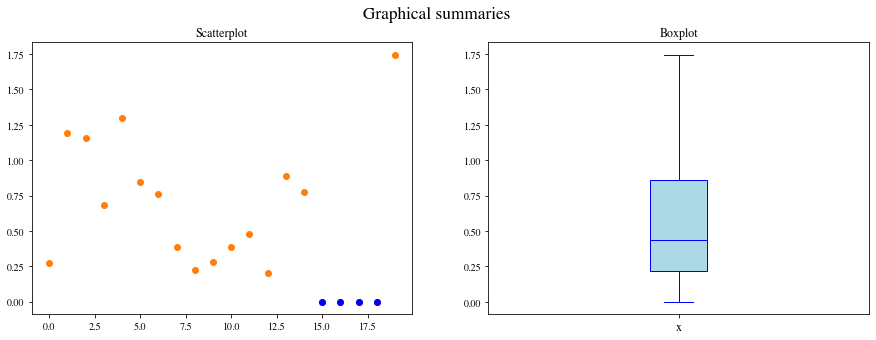

In [3]:
import numpy as np
import matplotlib.pyplot as plt
## Set matplotlib fonts
plt.rcParams["font.family"] = "times"
%matplotlib inline

## Transform x into a numpy array
x = np.array(x)
## Subplots
fig, axs = plt.subplots(1,2, figsize=(15,5))
## Set overall title
fig.suptitle('Graphical summaries', fontsize='xx-large')
## Subplot 1 
axs[0].plot(x, 'o', c='#ff7f0e', zorder=1)
axs[0].scatter(np.where(x < 0.01)[0], [0] * np.sum(x < 0.01), c='blue', zorder=2)
axs[0].set_title('Scatterplot') 
## Subplot 2
bp = axs[1].boxplot(x, patch_artist=True)
# Change outline color
for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color='blue')
for patch in bp['boxes']:
    patch.set(facecolor='lightblue') 
axs[1].set_xticklabels(['x'], fontsize=12)
axs[1].set_title('Boxplot')
plt.show()

### 1.2. Question 2
<span style="color:white">Conduct a one-sample Kolmogorov-Smirnov test to determine whether the data in Q1 are likely to have arisen from a Gamma distribution with density
$ f(x) = s^a/\Gamma(a)\cdot x^{a−1}\exp\{−x/s\}, $
where $a = 2$ and $s = 1/2$.</span>

In [4]:
stats.kstest(rvs=x, cdf=stats.gamma(a=2, scale=1/2).cdf)

KstestResult(statistic=0.31931438583334165, pvalue=0.025896993192640626)

How is the object `KstestResult` accessed?

In [5]:
KS = stats.kstest(rvs=x, cdf=stats.gamma(a=2, scale=1/2).cdf)
KS[0]

0.31931438583334165

### 1.3. Question 3
<span style="color:white"> A locksmith keeps records about the number of test keys he tries, that fail, in each lock before the lock opens.
A random selection of these records yields the following counts: </span>
    
|$x$|$0$|$1$|$2$|$3$|$\geq4$| 
|:-|:-|:-|:-|:-|:-|
|count|$12$|$11$|$5$|$5$|$7$|
    
<span style="color:white"> Suppose it is claimed that the number of test keys follows the distribution above. Perform an appropriate test,
at the 5% significance level, to test this claim. 
</span>

In [6]:
## Array of counts
counts = np.array([12, 11, 5, 5, 7])
## MLE for theta
theta = 1 / (1 + np.sum(np.multiply(counts, np.arange(5))) / np.sum(counts))
## Geometric probabilities obtained from MLE
f_exp = stats.geom(p=theta, loc=-1).pmf(np.arange(4))
f_exp = np.append(f_exp, 1-np.sum(f_exp))
## Chi-square test (argument: absolute frequencies)
stats.chisquare(f_obs=counts, f_exp=f_exp*np.sum(counts))

Power_divergenceResult(statistic=1.9463439941406255, pvalue=0.7456271531471544)

### 1.4. Question 5
<span style="color:white"> The following data are response ($y$) and covariate ($y$) pairs:</span>

|$x$|$y$|
|:-:|:-:|
|2.6550866|3.644926|
|3.7212390|4.659500|
|5.7285336|4.654434|
|9.0820779|4.316676|
|2.0168193|4.484011|
|8.9838968|5.255947|
|9.4467527|4.119184|
|6.6079779|3.231716|
|6.2911404|1.658974|
|0.6178627|8.966016|

<span style="color:white"> Construct a scatterplot displaying response against covariate, fit the model $y_i=\alpha+\beta/x_i+\varepsilon_i,\ \varepsilon_i\sim\mathbb N(0,\sigma^2)$, estimate its coefficients, and add the corresponding regression line to the scatterplot.</span>

In [7]:
x = [2.6550866, 3.7212390, 5.7285366, 9.0820779, 2.0168193, 8.9838968, 9.4467527, 6.6079779, 6.2911404, 0.6178627]
y = [3.644926, 4.659500, 4.654434, 4.316676, 4.484011, 5.255947, 4.119184, 3.231716, 1.658974, 8.966016]
x = np.array(x); y = np.array(y)

In [8]:
results = stats.linregress(1/x,y)
mle = [results.intercept, results.slope]
print(mle)

[3.3163738609618734, 3.311396018553027]


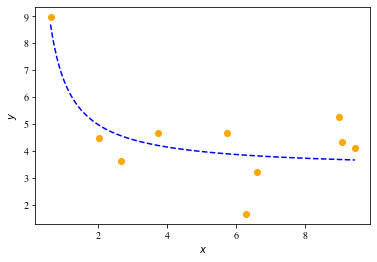

In [9]:
plt.scatter(x,y,color='orange')
r = np.linspace(np.min(x), np.max(x), num=250)
plt.plot(r, results.intercept +  results.slope / r, ls='--', c='blue')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

For more complex regression models, the library `statsmodels` uses expressions similar to *R* formulas, but only works on `pandas` `DataFrame` objects. For this example:

In [10]:
import pandas as pd
dat = pd.DataFrame(np.vstack((x,y)).T, columns=['x','y'])
type(dat)

pandas.core.frame.DataFrame

In [11]:
dat

,x,y
0,2.655087,3.644926
1,3.721239,4.659500
2,5.728537,4.654434
3,9.082078,4.316676
4,2.016819,4.484011
5,8.983897,5.255947
6,9.446753,4.119184
7,6.607978,3.231716
8,6.291140,1.658974
9,0.617863,8.966016


In [12]:
import statsmodels.formula.api as smf
results = smf.ols('y ~ 1 + np.divide(1,x)', data=dat).fit()

In [13]:
results.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     16.62
Date:                Wed, 12 Jan 2022   Prob (F-statistic):            0.00355
Time:                        23:26:27   Log-Likelihood:                -14.251
No. Observations:                  10   AIC:                             32.50
Df Residuals:                       8   BIC:                             33.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.3164      0.459      7.224      0.000       2.258       4.375
np.divide(1, x)     3.3114      0.812      4.077      0.004       1.438       5.185
==============================================================================
Omnibus:                        2.022   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                0.725
Skew:                          -0.659   Prob(JB):                        0.696
Kurtosis:                       2.956   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print(dir(results)) ## Inspect the output object

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid'

In [15]:
mle2 = list(results.params)
print(mle2)
print(mle)

[3.3163738609618716, 3.3113960185530265]
[3.3163738609618734, 3.311396018553027]


## 2. Computational Statistics
### 2.1. Question 1
<span style="color:blue"> Consider a sample $X_1,\dots,X_n$ of IID random variables following a geometric distribution with probability mass function $\mathbb P(X = x) = \theta(1−\theta)^x,\ x \in \{0,1,2,\dots\}$,
where the success probability $\theta\in(0,1)$ is unknown. </span>

<span style="color:blue"> Part 1) Generate a sample of size $n = 1000$ of IID random variables distributed according to a geometric distribution with a success probability $\theta = 0.2$. </span>

In *python*, there are two options for simulating geometric random variables: `numpy.random.geometric` and `scipy.stats.geom.rvs`. The syntax of the two functions is similar. The following code chunks also introduce two very useful functions: the `Counter` object from the library `collections`, and the `stem` plot. Can you guess what such functions do?

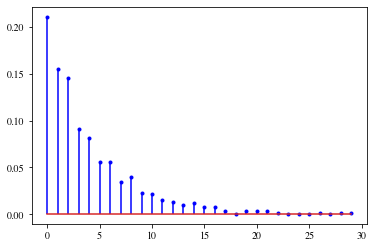

In [16]:
import numpy as np
from collections import Counter
n = 1000
np.random.seed(111)
geom_sample = np.random.geometric(p=0.2, size=n) - 1
geom = Counter(geom_sample)
plt.stem([geom[x] / n for x in range(30)], linefmt='b', markerfmt='b.')
plt.show()

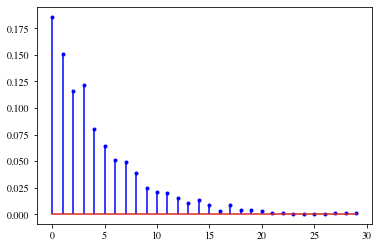

In [17]:
geom_sample2 = stats.geom(p=0.2,loc=-1).rvs(size=1000)
geom = Counter(geom_sample2)
plt.stem([geom[x] / n for x in range(30)], linefmt='b', markerfmt='b.')
plt.show()

<span style="color:blue"> Part 2) Plot the log-likelihood function for this sample as a function of $\theta$. </span>

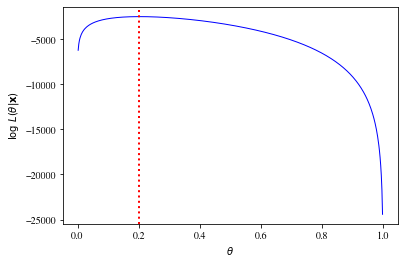

In [18]:
loglik = lambda theta: len(geom_sample) * np.log(theta) + np.log(1-theta) * np.sum(geom_sample)
thetas = np.linspace(start=0, stop=1, num=500)[1:-1]
plt.plot(thetas,list(map(loglik,thetas)), c='blue', linewidth=1)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\log\ L(\theta\vert\mathbf{x})$')
plt.axvline(x=0.2, c='red', ls='dotted', linewidth=2)
plt.show()

<span style="color:blue"> Part 3) Estimate by MLE of the parameter $\theta$ numerically and analytically. </span>

Analytical (exact) solution:

In [19]:
theta_hat = 1 / (1 + np.mean(geom_sample))
print(theta_hat)

0.20283975659229211


Numerical solution using `scipy.optimize.minimize`:

In [20]:
import scipy
out = scipy.optimize.minimize(fun=lambda x: -loglik(scipy.special.expit(x)), x0=0)
print(scipy.special.expit(out.x[0]))

0.2028397527427992


In [21]:
out = scipy.optimize.minimize(fun=lambda x: -loglik(x), x0=0.5, bounds=[(0.00001,0.99999)])
print(out.x[0])

0.2028397520533905


### 2.2. Question 2
<span style="color:white"> Part 1) Consider the following random walk: $X_0 \sim \mathbb N(0, 1)$ and $X_t\vert(X_0,\dots,X_{t−1}) \sim \mathbb N(X_{t−1}, 1)$. Simulate 1000 realizations of the random walk, $(X_1,\dots,X_{50})$. Make
normal quantile plots of the 1000 draws of $X_1$. Make similar plots for $X_2$, $X_{10}$ and $X_{50}$.</span>

Define a function for the random walk, which takes as argument the length $n$ of the walk:

In [22]:
def random_walk(n):
    rw = np.zeros(n+1)
    rw[0] = np.random.normal(loc=0, scale=1, size=1)
    for i in range(1,n+1):
        rw[i] = np.random.normal(loc=rw[i-1], scale=1, size=1)
    return rw

Simulate the 1000 random walks using list comprehension:

In [23]:
np.random.seed(111)
W = np.array([random_walk(n=50) for _ in range(1000)]).T

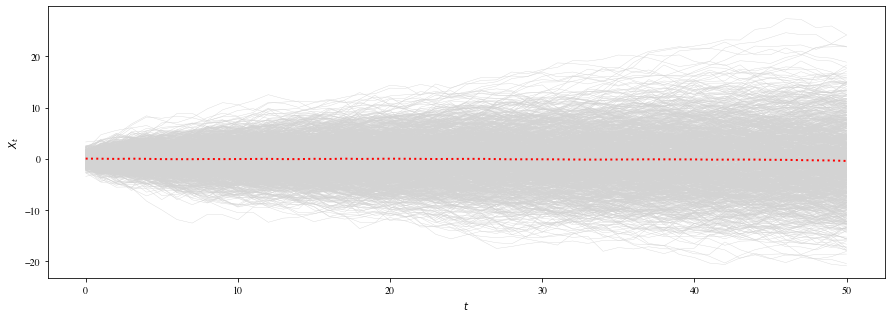

In [24]:
plt.figure(figsize=(15,5))
plt.plot(W, c='lightgray', linewidth=0.35)
plt.plot(W.mean(axis=1), c='red', ls='dotted', linewidth=2)
plt.xlabel(r'$t$')
plt.ylabel(r'$X_t$')
plt.show()

Obtain quantiles:

In [25]:
Q_empirical = np.percentile(a=W, q=np.linspace(0,100,num=250)[1:-1], axis=1).T

In [26]:
Q_theoretical = np.array([stats.norm.ppf(q=np.linspace(0,100,num=250)[1:-1] / 100, 
                                         loc=0, scale=np.sqrt(v+1)) for v in range(51)])

The theoretical quantiles are calculated using $X_t\sim\mathbb N(0,t+1)$.

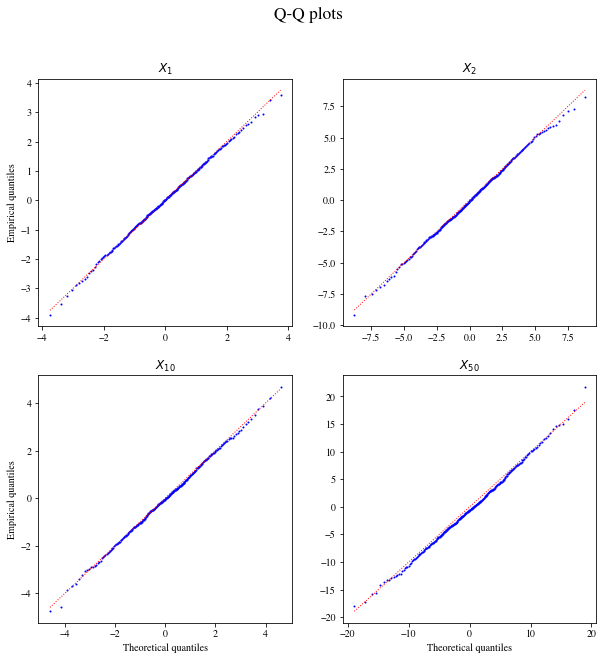

In [27]:
## Subplots environment
fig, axs = plt.subplots(2,2, figsize=(10,10))
## Set overall title
fig.suptitle('Q-Q plots', fontsize='xx-large')
axs[0,0].set_ylabel('Empirical quantiles')
axs[1,0].set_ylabel('Empirical quantiles')
axs[1,0].set_xlabel('Theoretical quantiles')
axs[1,1].set_xlabel('Theoretical quantiles')
axs[0,0].set_title(r'$X_1$')
axs[0,1].set_title(r'$X_2$')
axs[1,0].set_title(r'$X_{10}$')
axs[1,1].set_title(r'$X_{50}$')
## Subplots 
axs[0,0].scatter(Q_theoretical[1], Q_empirical[1], c='blue', s=1)
axs[1,0].scatter(Q_theoretical[2], Q_empirical[2], c='blue', s=1)
axs[0,1].scatter(Q_theoretical[10], Q_empirical[10], c='blue', s=1)
axs[1,1].scatter(Q_theoretical[50], Q_empirical[50], c='blue', s=1)
## Q-Q lines
axs[0,0].plot(np.linspace(np.min(Q_theoretical[1]), np.max(Q_theoretical[1]), num=2), 
             np.linspace(np.min(Q_theoretical[1]), np.max(Q_theoretical[1]), num=2), c='red', lw=1, ls='dotted')
axs[1,0].plot(np.linspace(np.min(Q_theoretical[2]), np.max(Q_theoretical[2]), num=2), 
             np.linspace(np.min(Q_theoretical[2]), np.max(Q_theoretical[2]), num=2), c='red', lw=1, ls='dotted')
axs[0,1].plot(np.linspace(np.min(Q_theoretical[10]), np.max(Q_theoretical[10]), num=2), 
             np.linspace(np.min(Q_theoretical[10]), np.max(Q_theoretical[10]), num=2), c='red', lw=1, ls='dotted')
axs[1,1].plot(np.linspace(np.min(Q_theoretical[50]), np.max(Q_theoretical[50]), num=2), 
             np.linspace(np.min(Q_theoretical[50]), np.max(Q_theoretical[50]), num=2), c='red', lw=1, ls='dotted')
plt.show()

<span style="color:white"> Part 2) Plot the correlation between $X_0$ and $X_t$ for $t = 1,\dots, 10$. </span>

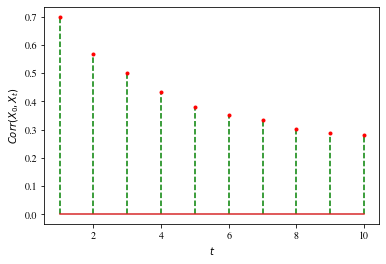

In [28]:
plt.stem(np.arange(10)+1, np.corrcoef(W)[1:11,0], linefmt='g--', markerfmt='r.')
plt.xlabel('$t$')
plt.ylabel('$Corr(X_0,X_t)$')
plt.show()

In [29]:
np.corrcoef(W[0],W[1])[0,1] - np.sqrt(1/2)

-0.006524539052879308

What does the function `corrcoef` do? 

### 2.3. Question 4
<span style="color:white"> Consider the log-linear model $Y\sim\mathrm{Poisson}(\lambda_i)$ with $\log(\lambda_i) = \alpha + \beta x_i$ for $i=1,\dots,5$, where $\mathbf{x} = (1, 5, 1, 2, −1)$ and $(\alpha,\beta) = (1, −0.5)$. </span>

<span style="color:white"> Part 1) A data set simulated under this model is $\mathbf{Y} = (3, 2, 1, 0, 4)$. Use _python_ to fit the model to this data. Report the observed Fisher information matrix and 95% confidence intervals for $(\alpha, \beta)$. </span>

In [30]:
y = np.array([3,2,1,0,4])
x = np.array([1,5,1,2,-1])
poisson_model = sm.GLM(y, sm.add_constant(x), 
                       family=sm.families.Poisson(sm.genmod.families.links.log())).fit()

In [31]:
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                    5
Model:                            GLM   Df Residuals:                        3
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.2293
Date:                Wed, 12 Jan 2022   Deviance:                       5.5873
Time:                        23:26:30   Pearson chi2:                     3.94
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9175      0.364      2.517      0.012       0.203       1.632
x1            -0.1741      0.181     -0.961      0.337      -0.529       0.181
==============================================================================
"""

In [32]:
alpha_hat, beta_hat = poisson_model.params
g = lambda x, alpha, beta: np.exp(alpha + x * beta)
## Components of Fisher information matrix   
fish_11 = np.sum(g(x, alpha_hat, beta_hat))
fish_12 = np.sum(x * g(x, alpha_hat, beta_hat))
fish_22 = np.sum(np.power(x,2) * g(x, alpha_hat, beta_hat))
## Fisher information matrix
fish = np.array([fish_11,fish_12,fish_12,fish_22]).reshape(2,2)
print(fish)

[[10.         10.00000001]
 [10.00000001 40.44997091]]


<span style="color:white"> Part 2) Simulate 1000 draws from the sampling distribution of the maximum likelihood estimates of $(\alpha, \beta)$. (Hint: You will need to simulate 1000 data sets under the model and fit the model to each). Make a scatter plots of your 1000 draws. </span>

In [33]:
## Parameters and pre-allocated arrays
np.random.seed(11)
n = 1000
y_sim = np.zeros((n,len(x)))
alphas_mle = np.zeros(n)
betas_mle = np.zeros(n)
## Repeat n times
alpha = 1; beta = -0.5
lambdas_x = g(x,alpha,beta)
for i in range(n):
    ## Simulate from the model
    y_sim[i] = np.random.poisson(size=len(x),lam=lambdas_x)
    ## Fit model to simulated data
    poisson_model = sm.GLM(y_sim[i], sm.add_constant(x), 
                               family=sm.families.Poisson(sm.genmod.families.links.log())).fit(maxiter=10)
    ## Obtain the MLE
    if poisson_model.converged:
        alphas_mle[i], betas_mle[i] = poisson_model.params
    else:
        alphas_mle[i], betas_mle[i] = None, None

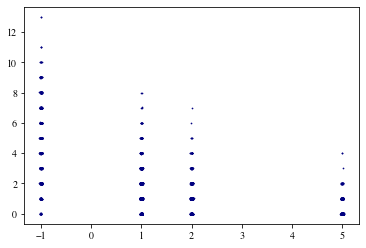

In [34]:
## Scatterplot (with jittering)
for i in range(n):
    plt.scatter(x + np.random.normal(size=len(x),scale=0.01), y_sim[i] + np.random.normal(size=len(x),scale=0.01), 
               c='#000080', s=0.5)
plt.show()

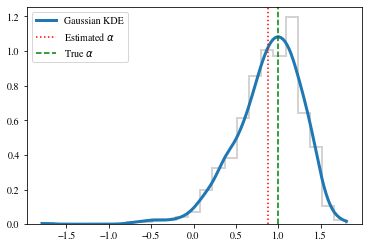

In [35]:
from scipy.stats import gaussian_kde as kde
plt.hist(alphas_mle, bins=25, color='lightgray', density=True, histtype=u'step', lw=2)
kernel = kde(alphas_mle[~np.isnan(alphas_mle)], bw_method='silverman')
positions = np.linspace(np.nanmin(alphas_mle),np.nanmax(alphas_mle), 150)
plt.plot(positions, kernel(positions), lw=3, label='Gaussian KDE')
plt.axvline(x=np.nanmean(alphas_mle), c='red', ls='dotted', label=r'Estimated $\alpha$')
plt.axvline(x=alpha, c='green', ls='dashed', label=r'True $\alpha$')
plt.legend()
plt.show()

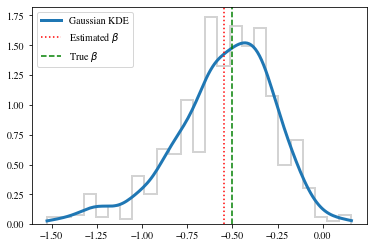

In [36]:
plt.hist(betas_mle, bins=25, color='lightgray', density=True, histtype=u'step', lw=2)
kernel = kde(betas_mle[~np.isnan(betas_mle)], bw_method='silverman')
positions = np.linspace(np.nanmin(betas_mle),np.nanmax(betas_mle), 150)
plt.plot(positions, kernel(positions), lw=3, label='Gaussian KDE')
plt.axvline(x=np.nanmean(betas_mle), c='red', ls='dotted', label=r'Estimated $\beta$')
plt.axvline(x=beta, c='green', ls='dashed', label=r'True $\beta$')
plt.legend(loc='upper left')
plt.show()

## 3. Data analysis using `scikit-learn`

The library `scikit-learn` offers a variety of classification, regression and clustering algorithms under a unified interface. It is mostly useful for *machine learning* projects. If you decided to install Anaconda, it should already be available. [Standard datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) are shipped with `scikit`. They can be quite useful for debugging algorithms. For example, the _Iris_ dataset can be loaded as follows:

In [37]:
from sklearn import linear_model, datasets
iris = datasets.load_iris()
X = iris.data[:,:]
Y = iris.target

### 3.1 Cross-validation

`scikit-learn` provides different cross-validation techniques. In the following, `StratifiedKFold` is an iterator which outputs pairs of indices for the train and test instances. Such indices are then used to slice the dataset.

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=111)
logreg = linear_model.LogisticRegression(multi_class='multinomial')

j = 1
for train, test in skf.split(X, Y):
    ypred = logreg.fit(X[train], Y[train]).predict(X[test])
    print('*' * 7,'\nSplit ', j,'\n','*' * 7,'\nTrain indices:\n', train, '\nTest indices:\n', test, sep='')
    j += 1
    print('MSE =', mean_squared_error(Y[test], ypred), end='\n\n')

*******
Split 1
*******
Train indices:
[  0   1   2   3   5   7   8   9  11  13  14  18  19  20  21  22  24  26
  29  30  31  33  34  38  40  41  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  60  61  63  65  66  67  68  69  70  73  74  75
  76  77  78  87  89  90  91  93  95  96  97  98 100 101 102 103 105 106
 108 109 112 113 116 118 121 123 124 125 126 128 131 132 133 134 136 137
 138 140 141 142 143 144 145 146 147 148]
Test indices:
[  4   6  10  12  15  16  17  23  25  27  28  32  35  36  37  39  42  59
  62  64  71  72  79  80  81  82  83  84  85  86  88  92  94  99 104 107
 110 111 114 115 117 119 120 122 127 129 130 135 139 149]
MSE = 0.02

*******
Split 2
*******
Train indices:
[  3   4   6   8   9  10  11  12  13  14  15  16  17  18  23  25  26  27
  28  29  31  32  35  36  37  38  39  40  42  43  46  47  48  50  51  55
  59  60  62  64  65  68  69  70  71  72  74  75  76  77  78  79  80  81
  82  83  84  85  86  88  90  92  94  95  96  98  99 100 104 107 1

### 3.2 Model selection (reference: [Parameter estimation using grid search with cross-validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html))

Using cross-validated scores, model selection can be performed efficiently through `GridSearchCV`. In the following, we will load the `digits` dataset and perform grid search over the parameters of a support vector machine (SVM) classifier. The dataset consists $8\times 8$ images of handwritten digits, and a corresponding label. The data can be loaded as follows:

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

digits = datasets.load_digits()
n_samples = len(digits.images)
X = digits.images.reshape(n_samples, -1)
y = digits.target

In the above preprocessing step, the images in `digits.images` are transformed from $8\times 8$ arrays to $64$-dimensional vectors. The images can be plotted using `plt.imshow`:

True labels: 4 0 7 2 5 3 7 5 6 

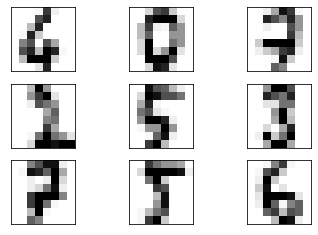

In [40]:
np.random.seed(111)
print('True labels: ', end='')
for i in range(9):
    plt.subplot(int('33' + str(i+1)))
    random_index = np.random.choice(X.shape[0])
    print(y[random_index], end=' ')
    plt.imshow(digits.images[random_index], cmap='Greys')
    plt.xticks(ticks=[], labels=[]); plt.yticks(ticks=[], labels=[])
plt.show()

First, a split in training and testing data is defined. Then, the set of models under consideration is stored in the list `tuned_parameters`:

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
## Set of models inspected
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

`GridSearchCV` takes an estimator from regression, classification or clustering, a dictionary of parameters to try for that particular estimator, a cross-validation iterator and a scoring (error) function. The parameter search can be performed in parallel with `n_jobs=-1`. The `fit` function of `GridSearchCV` then scores every possible combination of the `tuned_parameters` and saves the best one in the `best_estimator_` attribute.

In this case, the estimator is Support Vector Classification (SVC), the dictonary of parameters is `tuned_parameters`, and the scoring (error) function is automatically determined from the SVC estimator (although we could define our own if we wanted to).

In [42]:
clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, n_jobs=-1) # we could define our own scoring function here
clf.fit(X_train, y_train)
print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [43]:
print("Grid scores on development set:")
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 1.96, params))

Grid scores on development set:
0.986 (+/-0.020) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.958 (+/-0.028) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.987 (+/-0.020) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.981 (+/-0.028) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.987 (+/-0.020) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.027) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.987 (+/-0.020) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.027) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.972 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.972 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.972 (+/-0.012) for {'C': 100, 'kernel': 'linear'}
0.972 (+/-0.012) for {'C': 1000, 'kernel': 'linear'}


The classification performance of the best estimator can then be reported with [`classification_report`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report).

In [44]:
print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.97      1.00      0.98        90
           2       0.99      0.98      0.98        92
           3       1.00      0.99      0.99        93
           4       1.00      1.00      1.00        76
           5       0.99      0.98      0.99       108
           6       0.99      1.00      0.99        89
           7       0.99      1.00      0.99        78
           8       1.00      0.98      0.99        92
           9       0.99      0.99      0.99        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899



### 3.3 Confusion matrix

The confusion matrix is a useful visual tool to asess the classification performance. Its $(i,j)$-th entry counts the number of objects having true label $i$ classified to $j$ by the algorithm. In the ideal case, you would see only entries on the diagonal. In that case, every label would have been predicted perfectly.

Confusion matrix:
 [[ 89   0   0   0   0   0   0   0   0   0]
 [  0  90   0   0   0   0   0   0   0   0]
 [  0   1  90   0   0   0   0   1   0   0]
 [  0   0   1  92   0   0   0   0   0   0]
 [  0   0   0   0  76   0   0   0   0   0]
 [  0   0   0   0   0 106   1   0   0   1]
 [  0   0   0   0   0   0  89   0   0   0]
 [  0   0   0   0   0   0   0  78   0   0]
 [  0   2   0   0   0   0   0   0  90   0]
 [  0   0   0   0   0   1   0   0   0  91]]


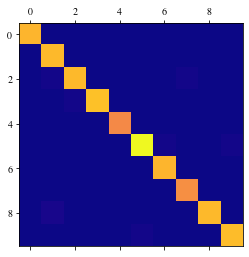

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plt.matshow(cm, cmap='plasma')
print('Confusion matrix:\n', cm)

### 3.4 ROC curve

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a **binary** classifier system as its discrimination threshold is varied. We will use simulated data for binary classification using the example in Hastie et al. (2009), Example 10.2. The simulated predictors $\mathbf x_i = (x_{i,1},\dots,x_{i,10})$ are 10 standard independent Gaussian variables and the target $y_i$ is defined by:
$$
y_i = \left\{\begin{array}{ll} 1 & \sum_{j=1}^{10} x_{i,j}^2 > 9.34, \\ -1 & \mathrm{otherwise}. \end{array}\right.
$$

In [46]:
from sklearn.datasets import make_hastie_10_2 
from sklearn.linear_model import LogisticRegression
## Simulate data using Hastie's example
X, y = make_hastie_10_2(random_state=111)
## Split in training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=171)
## Define parameters for tuning
tuned_parameters = [{'penalty': ['l1', 'l2'],'C': [1, 10, 100, 1000]}]
## Logistic regression
logreg = LogisticRegression(solver='saga')
clf = GridSearchCV(logreg, tuned_parameters)
clf.fit(X_train, y_train)
clf.best_score_

0.5039814814814815

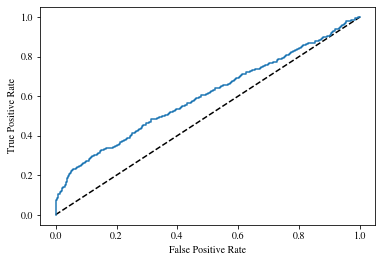

Area under the curve (AUC) = 0.60028


In [47]:
## Plot ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred = clf.predict_proba(X_test)
y_score = np.max(y_pred, axis=1)
fpr, tpr, th = roc_curve(y_test, y_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr)
plt.show()
print('Area under the curve (AUC) =', round(roc_auc_score(y_test, y_score), 5))

### 3.5 Plot the learning curve (reference: [Plotting learning curves](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html))

The function [`sklearn.model_selection.learning_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html) is another one-liner which might be useful for illustrating the learning behavior of a given a model (for a fixed choice of parameters). Building upon the last example, the learning curve of the best model found through grid search will be plotted. 

In [48]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(clf.best_estimator_, X, y, 
                                                        cv=5, train_sizes=np.linspace(.1,1.0,5))
print(train_sizes)

[ 960 3120 5280 7440 9600]


The [`fill_between`](https://matplotlib.org/2.0.2/examples/pylab_examples/fill_between_demo.html) plotting function in *Matplotlib* can be used to show the standard deviation in the score estimates. 

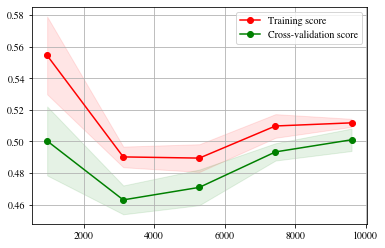

In [49]:
## Mean and standard deviation of scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
## Plot with grid
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.show()

## Exercises
1. [Applied Statistics & `scikit-learn`]
    1. Load the dataset *California Houses* from `sklearn.datasets.fetch_california_housing`. After checking the output of the function, store the response (`target`, corresponding to house prices) in a *NumPy* array `y`, and the predictors in a *Pandas* `DataFrame` called `X`, with column names `feature_names` and data `data`. Add a column of ones to the data frame `X`, called `Intercept`.
    2. Display scatterplots of each covariate in `X` against the response `y`, grouping the plots in a $2\times 4$ grid. Add to each scatterplot the linear regression line calculated from `stats.linregress`.
    3. Consider the normal linear model $\mathbf y = \mathbf X\mathbf\beta + \mathbf\varepsilon$, where $\mathbf y\in\mathbb R^n$ is the response vector, $\mathbf X\in\mathbb R^{n\times d}$ is the design matrix, $\mathbf\beta\in\mathbb R^d$ is the vector of coefficients and $\mathbf\varepsilon\in\mathbb R^n$ is the error term, where $\mathbf\varepsilon\sim\mathbb N_n(\mathbf 0_n, \sigma^2I_n)$. Using `X` and `y` from the previous part, calculate the maximum likelihood estimate of $\mathbf\beta$ using the closed form solution $\hat\beta=(\mathbf X^\intercal\mathbf X)^{-1}\mathbf X^\intercal\mathbf y$.
    4. Fit a full linear regression model for $\mathbf y$ given $\mathbf X$ with `statsmodels.regression.linear_model.OLS`. Print the output of the `summary()` function.
    5. Repeat the same procedure using `sklearn.linear_model.LinearRegression`.


2. [Computational Statistics] Consider the following random walk: $X_0 \sim \mathbb N(100, 1)$ and $X_t\vert(X_0,\dots,X_{t−1}) \sim \mathbb N(\rho X_{t−1}, 1-\rho^2)$, $\rho\in(0,1)$. 
    1. Write a function to simulate realisations of the random walk, taking `rho` and `n` (length of the observation period) as arguments, and use it to simulate 1000 realizations of the random walk, $(X_1,\dots,X_{50})$ for $\rho=0.5$. 
    2. Make a normal quantile plot of the 1000 draws of $X_{50}$. Repeat the simulation and normal quantile plot for $\rho = 0.8, 0.95$ and $0.99$. What pattern do you see? 
    3. Simulate four single chains of length 1000, $(X_1,\dots,X_{1000})$ with $\rho = 0.5, 0.8, 0.95$ and $0.99$. Plot the autocorrelation functions of these chains and compare with the plots from the previous part. 
    (*Hint*: check `statsmodels.tsa.stattools.acf`)
  
  
3. [Data Analysis using `scikit-learn`] In this question, you will run the K-Nearest Neighbors (KNN) algorithm (`KNeighborsClassifier` in `sklearn.neighbors`) on the Iris flower data set (`iris = datasets.load_iris()`).
    1. Use `StratifiedKFold` to split the data into 10 parts, and run a for loop to find classification accuracy for each test dataset when $K=7$ for KNN.
    2. Use `GridSearchCV` to search for an optimal value of $K$. Create a plot of $K$ values vs accuracy.

## References
* T. Hastie, R. Tibshirani and J. Friedman, “Elements of Statistical Learning Ed. 2”, Springer, 2009.